In [ ]:
'''
TO DO: 
Include more variables
Explore the MSE change depending on number of variables
Maybe bagging and/or boosting -> first we need more variables; improving model accuracy

'''

'''
Ideas:
For assesing severity and specifying exact values of each variable to asses the severity level
we could e.g. explore the distirbutions, and use sigma as the reference point

'''



In [1]:
# Imports Libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [4]:
# Read file and display it
df = pd.read_excel('files\GTD\globalterrorismdb_0522dist.xlsx')
df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
'''
Columns explanation
Property -> property damage (yes(1)/no(0))
Propextent (Property damage) -> Major(1), Minor(3), Unknown(4)
nkill includes victims and perpatrators deaths

'''

In [8]:
# Ensure that the data types are correct
df['nkill'] = pd.to_numeric(df['nkill'])
df['nkillter'] = pd.to_numeric(df['nkillter'])
df['nwound'] = pd.to_numeric(df['nwound'])
df['nwoundte'] = pd.to_numeric(df['nwoundte'])

# Killed victims and injured victims
df['vkill'] = df['nkill'] - df['nkillter']
df['vwound'] = df['nwound'] - df['nwoundte']

# Include only relevant variables
df_final = df[['property', 'vkill', 'vwound']]

# Clean dataframe
# A lot of nan values, don't know the reason
df_final = df_final.dropna()

df_final.head(5)

,property,vkill,vwound
5,1,0.0,0.0
7,1,0.0,0.0
8,1,0.0,0.0
9,1,0.0,0.0
11,1,0.0,0.0


In [15]:
# Create a column for severity and set standard value to 1
df_final['severity_lvl'] = 1

# Severity level based on conditions
for index, column in df_final.iterrows():
    if column['vwound'] >= 1:
        df_final.loc[index, 'severity_lvl'] = 2
    if column['vkill'] >= 1:
        df_final.loc[index, 'severity_lvl'] = 3
    if column['vkill'] >= 1 and column['property'] == 1:
        df_final.loc[index ,'severity_lvl'] = 4
    if column['vkill'] >= 1 and column['property'] == 1 and column['vwound'] >= 1:
        df_final.loc[index, 'severity_lvl'] = 5

df_final

,property,vkill,vwound,severity_lvl
5,1,0.0,0.0,1
7,1,0.0,0.0,1
8,1,0.0,0.0,1
9,1,0.0,0.0,1
11,1,0.0,0.0,1
...,...,...,...,...
209699,1,0.0,0.0,1
209700,1,0.0,0.0,1
209703,1,0.0,0.0,1
209704,0,1.0,0.0,3


In [16]:
print(pd.value_counts(df_final['severity_lvl']))

severity_lvl
1    48047
3    39825
2    22694
5    13602
4     5840
Name: count, dtype: int64


C:\Users\majak\AppData\Local\Temp\ipykernel_2544\3189674596.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(df_final['severity_lvl']))


In [18]:
# Specify independent and dependent variables
Y = df_final['severity_lvl']
X = df_final.drop(columns={'severity_lvl'})

# Split into train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Random forest
random_forest_model = RandomForestRegressor()
# Fit model
model = random_forest_model.fit(X_train, Y_train)
# Make predictions
predictions = model.predict(X_test)
# Evaluation
mse = mean_squared_error(Y_test, predictions)
print(f'mean squarred error: {mse}')

mean squarred error: 0.0


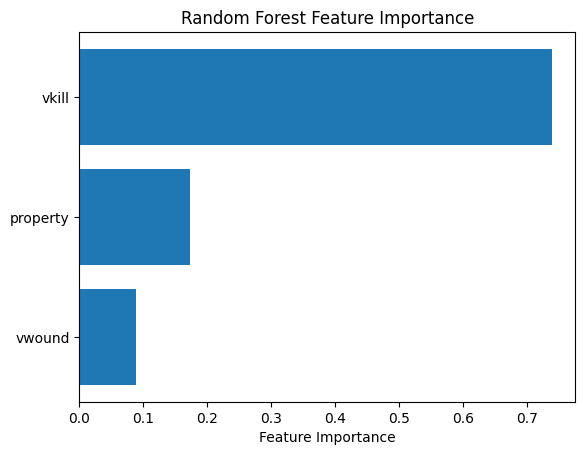

In [19]:
# Feature importances
feature_importances = random_forest_model.feature_importances_
feature_names = list(X.columns)
sorted_idx = feature_importances.argsort()

# Plot
plt.figure()
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align = 'center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

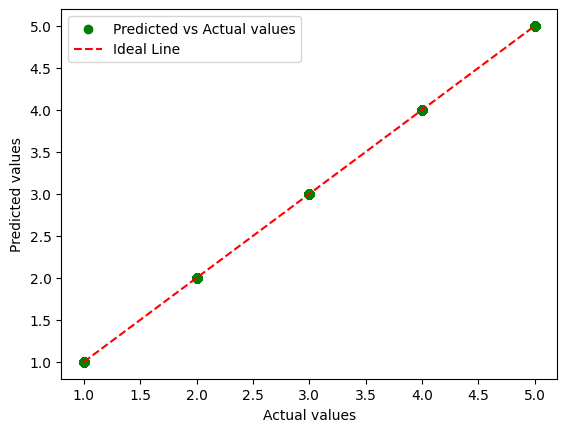

In [22]:
# Predicted vs actual values
plt.figure()
plt.scatter(Y_test, predictions, label = 'Predicted vs Actual values', color = 'green')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle = '--', color = 'red', label = 'Ideal Line')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()